# 1 - Introdução

## 1.1 - Apresentação
vamos explorar o algoritmo de classificação Naive Bayes, que é baseado no Teorema de Bayes. Vamos aprender sobre a importância de Bayes na estatística e como seu trabalho foi publicado por Richard Price. Vamos realizar um projeto prático, onde faremos análise exploratória automatizada e utilizaremos hiperparâmetros. Além disso, vamos aprender a automatizar a seleção de features, para identificar as mais relevantes para nosso modelo. Isso é importante para termos um modelo eficiente e não sobrecarregado com variáveis desnecessárias. Aproveitem o módulo!

## 1.2 - Introdução
vamos explorar o algoritmo Naive Bayes, que é baseado em probabilidade condicional e independência de variáveis. Vamos abordar desde o conceito do algoritmo até a entrega do modelo através de uma API. A agenda do módulo inclui uma explicação detalhada do Naive Bayes, métricas de classificação e um projeto prático em Python. Vamos explorar todo o processo, desde a análise exploratória de dados até a seleção automática de features.

## 1.3 - O Que é o Algoritmo Naive Bayes
O algoritmo de Naive Bayes é um método de aprendizado de máquina que faz previsões com base no teorema de Bayes. Ele assume que as características usadas para fazer a previsão são independentes entre si, o que é uma simplificação. O algoritmo é amplamente utilizado em classificação de texto, como filtragem de spam, e é eficiente e fácil de implementar para conjuntos de dados grandes. A fórmula da probabilidade condicional é usada para calcular a probabilidade de um evento ocorrer dado que outro evento já ocorreu. No contexto do machine learning, o Naive Bayes é expresso como a probabilidade de uma variável target dado um conjunto de variáveis preditoras.

# 2 - Métricas de Classificação
discutimos as principais métricas de classificação em algoritmos. A acurácia é a proporção de instâncias corretamente classificadas em relação ao total de instâncias, mas pode ser enganosa em conjuntos de dados desbalanceados. A precisão mede a proporção de instâncias verdadeiramente positivas em relação ao total de instâncias classificadas como positivas, sendo útil quando o custo dos falsos positivos é alto. O recall mede a proporção de instâncias verdadeiramente positivas identificadas pelo modelo, sendo crucial quando o custo dos falsos negativos é alto. O F1-score é uma média harmônica entre precisão e recall, útil quando há um equilíbrio entre as duas métricas.

# 3 - Apresentação do Projeto
Neste módulo, vamos desenvolver um projeto de previsão de obesidade em uma clínica de endocrinologia. Utilizaremos um conjunto de dados de um estudo sobre obesidade, onde os participantes preencheram um formulário com hábitos de saúde e informações pessoais. A ideia é criar um classificador binário usando o algoritmo de Naive Bayes para prever se um paciente é obeso ou não com base nas respostas do formulário. O questionário não inclui informações como peso e altura, então vamos tentar estimar a condição de obesidade apenas com base nos hábitos. Vamos carregar os dados, explorar as variáveis, preparar o conjunto de treinamento e teste, treinar o modelo e validar usando métricas adequadas. Também faremos a seleção automática de features para identificar quais características são mais importantes na predição da obesidade. Por fim, salvaremos o modelo e o disponibilizaremos via API. Agora, vamos para o código!

# 4 - EDA

## 4.1 - Importação das Bibliotecas

In [4]:
#EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score

# Otimização de Hiperparâmetro
import optuna

# Salvar modelo
import joblib

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 4.2 - Carga dos Dados
começamos um projeto prático de algoritmo de Naive Base. Nosso objetivo é criar um modelo que possa prever se uma pessoa é obesa ou não com base em suas características. Mostramos a estrutura do projeto, com um conjunto de dados para treinamento, um dicionário de dados explicando as colunas e um arquivo de exemplo para chamada de API. Também introduzimos a importação das bibliotecas necessárias, como pandas, plotly, matplotlib, scikit-learn, flask, entre outras. Carregamos o conjunto de dados e exploramos suas colunas e estrutura. Nas próximas aulas, continuaremos a desenvolver o projeto.

In [5]:
# Carregar Dataset
df_obesidade = pd.read_csv('./dataset_obesidade.csv')
df_obesidade.head()

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [6]:
# Mostrar estrutura
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

## 4.3 - Análise Exploratória - Quantitativas
começamos a análise exploratória de dados do nosso dataset. Primeiro, convertemos algumas variáveis do tipo float para int64, já que elas representam valores inteiros. Em seguida, verificamos se havia valores ausentes em todas as colunas e constatamos que não havia.
Em seguida, iniciamos o EDA (Exploratory Data Analysis) analisando a distribuição da variável alvo, que é a obesidade. Utilizamos o Plotly para criar um gráfico de barras mostrando a contagem de valores para cada classe de obesidade. Observamos que as classes estão bem balanceadas, o que é uma boa notícia, pois não precisaremos aplicar técnicas para tratar desbalanceamento de dados.
Também calculamos a porcentagem de cada classe e confirmamos que a base não está desbalanceada.
Em seguida, realizamos uma análise univariada da variável idade. Criamos um histograma para visualizar a distribuição dos valores e um boxplot para identificar outliers. Observamos que a maioria dos entrevistados tem entre 15 e 28 anos, com a mediana da idade sendo 22 anos. Identificamos alguns outliers acima de 37 anos, mas decidimos mantê-los, pois são dados legítimos.

In [7]:
# Converter tipos das colunas para inteiro
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 
                 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']

df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype('int64')

In [8]:
# Distribuição da Variável Target - Obeso
px.bar(df_obesidade.value_counts('Obeso'))

In [9]:
# Distribuição da Variável Target - Obeso em porcentagem
px.bar(df_obesidade.value_counts('Obeso')/len(df_obesidade)*100)

In [10]:
# Análise Univariada - Idade
px.histogram(df_obesidade, x='Idade')

In [11]:
# Análise Univariada - Idade
px.box(df_obesidade, y='Idade')

## 4.4 - Análise Exploratória - Qualitativas
começamos a explorar as variáveis do nosso conjunto de dados. Analisamos as variáveis categóricas, como gênero, histórico de obesidade na família, nível de exercício e nível de uso de tela. Observamos que o gênero está bem balanceado, com 50,59% de entrevistados do sexo masculino e 49,40% do sexo feminino. A maioria dos entrevistados relatou ter histórico de sobrepeso na família. Quanto ao nível de exercício, a maioria não pratica atividade física. Já em relação ao nível de uso de tela, a maioria tem um baixo nível de uso. Em seguida, formulamos hipóteses sobre a influência da faixa etária na obesidade e realizamos uma análise estatística da variável idade. Criamos categorias de faixa etária e transformamos a variável idade em uma variável ordinal. Agora, iremos utilizar o teste de qui-quadrado para avaliar o relacionamento entre a faixa etária e a obesidade.

In [12]:
# Análise Univariada - Genero em porcentagem
px.bar(df_obesidade.value_counts('Genero_Masculino')/len(df_obesidade)*100)

In [13]:
# Análise Univariada - Histórico Obesidade Familiar em porcentagem
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso')/len(df_obesidade)*100)

In [14]:
# Análise Univariada - Nível Exercício em porcentagem
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica')/len(df_obesidade)*100)

In [15]:
# Análise Univariada - Nível de Uso de Tela em porcentagem
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela')/len(df_obesidade)*100)

In [16]:
# Formulação de Hipótese
# Faixa Etária influencia em Obesidade
df_obesidade.Idade.describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [17]:
# Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]

labels_faixa_etaria = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-70']    
df_obesidade['Faixa_Etaria_String'] = pd.cut(x = df_obesidade['Idade'], bins=bins, labels=labels_faixa_etaria)

#mesma coisa pra variável que vou usar no modelo
df_obesidade['Faixa_Etaria'] = pd.cut(x = df_obesidade['Idade'], bins=bins, labels=bins_ordinal)

df_obesidade.head(2)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-29,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-29,1


## 4.5 - Análise Exploratória - Teste qui-quadrado
aprendemos a realizar um teste de hipótese chamado teste de qui-quadrado para avaliar se duas variáveis são independentes. Para isso, criamos uma tabela de contingência usando o método fromData da biblioteca StatsModels. Em seguida, utilizamos o método test_nominal_association() para realizar o teste de qui-quadrado de Pearson. O resultado mostrou que as variáveis não são independentes, ou seja, há uma relação entre elas. Isso nos indica que a variável de faixa etária pode ser útil na previsão da variável resposta. No próximo vídeo, vamos automatizar nosso EDA para obter respostas mais rápidas.

In [18]:
# Criar Tabela de Contingência - Faixa Etária e Obesidade
tabela_de_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obeso', 'Faixa_Etaria_String']])
tabela_de_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-19,20-29,30-39,40-49,50-59,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [19]:
# Teste de Chi-Square de Pearson
print(tabela_de_contingencia_faixa_etaria.test_nominal_association())

#df = grau de liberdade
# p-value < 0.05, rejeitamos H0, portanto as variáveis não são idependentes

df          5
pvalue      0.0
statistic   170.1116865347508


## 4.6 - Analise Exploratória Automatizada
continuamos nossa análise exploratória de dados e aprendemos a automatizar o processo usando a biblioteca SweetViz. Com apenas algumas linhas de código, podemos gerar um relatório completo com informações sobre as variáveis do nosso conjunto de dados. O relatório inclui estatísticas descritivas, distribuição das variáveis, correlações e associações com a variável alvo. Além disso, podemos identificar as variáveis mais relevantes para o nosso modelo, com base nas associações visualizadas. Essa automação nos ajuda a selecionar as melhores variáveis para o nosso modelo e obter insights adicionais.

In [20]:
# Automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obeso')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



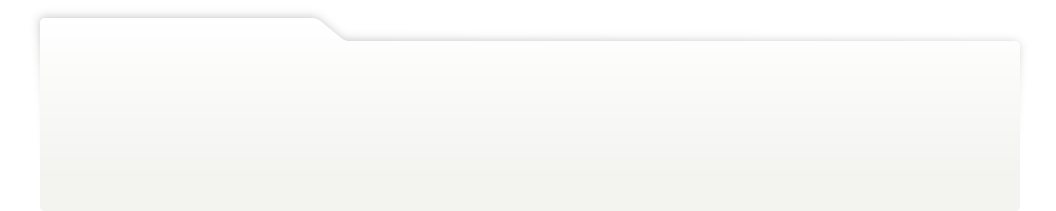
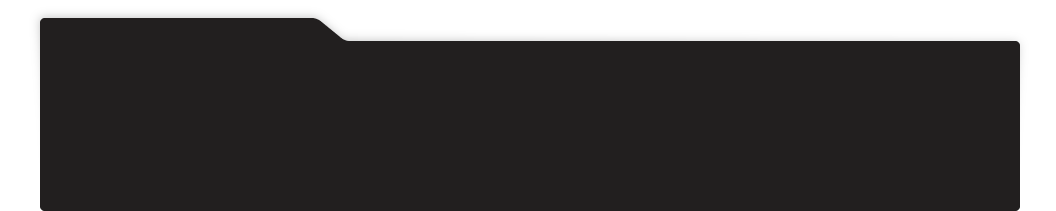
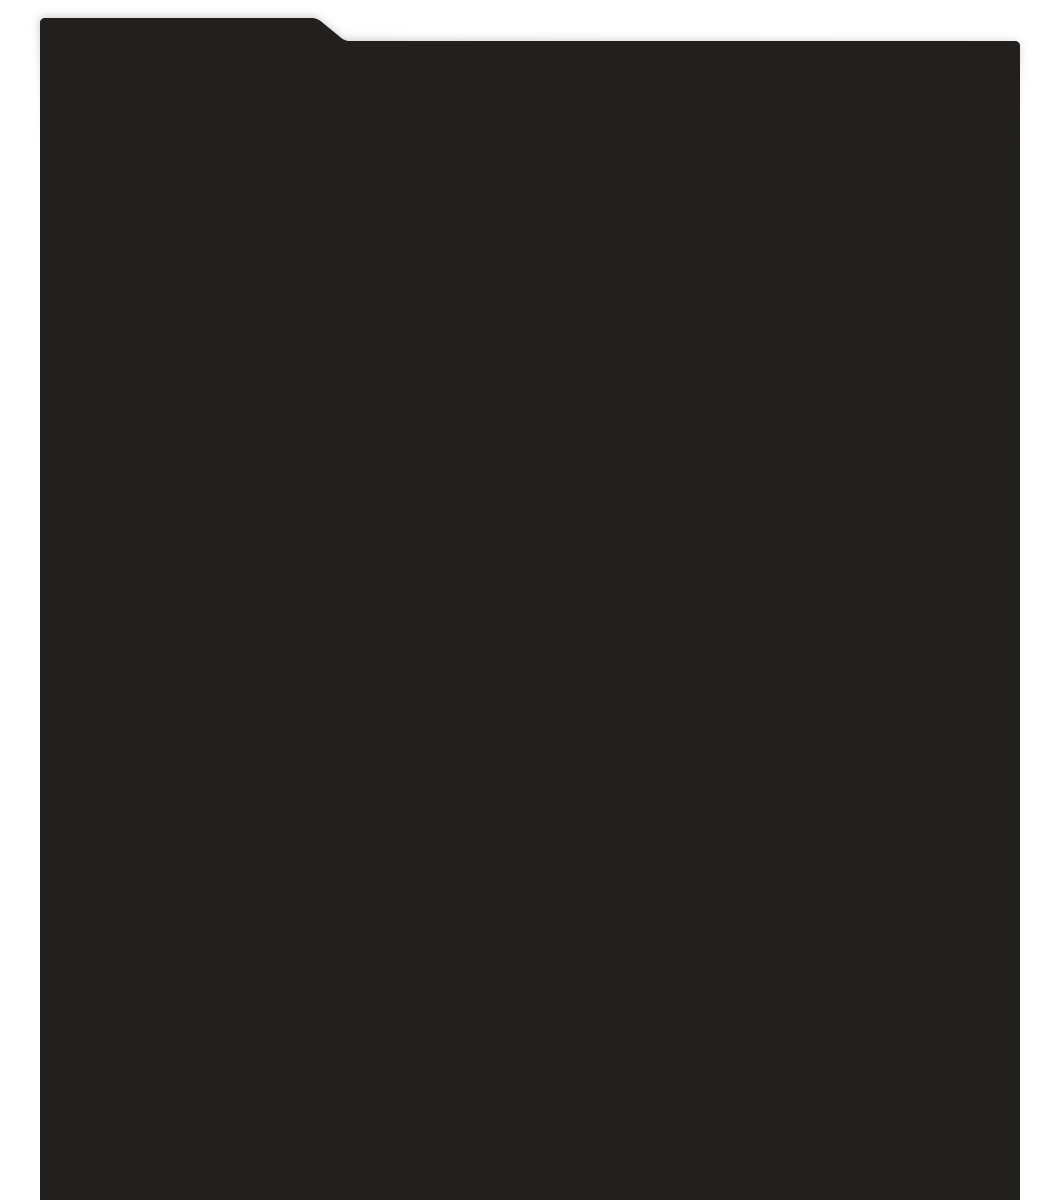
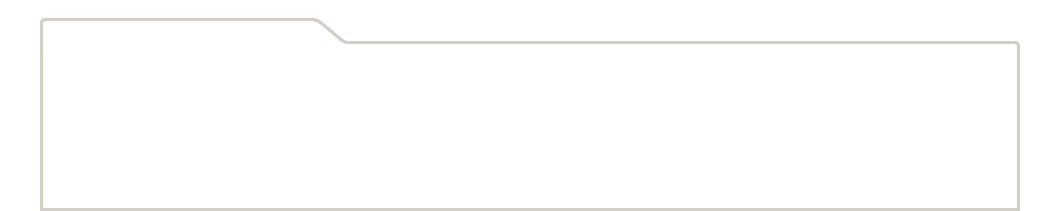
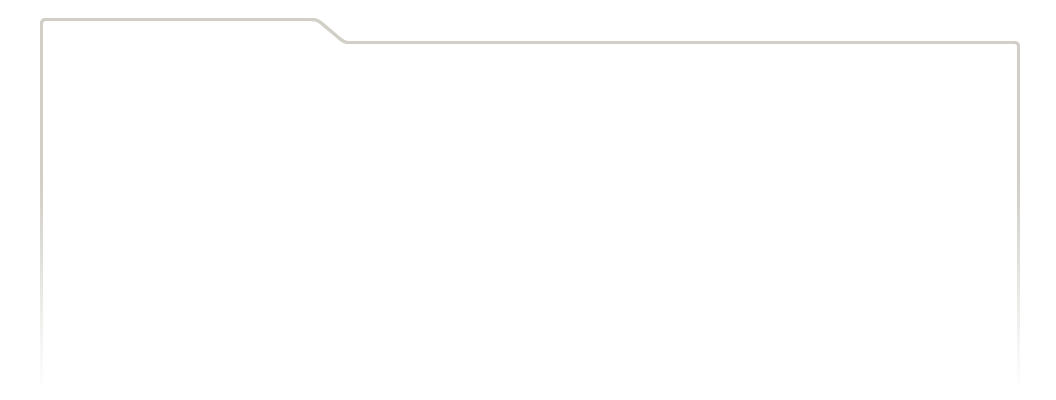
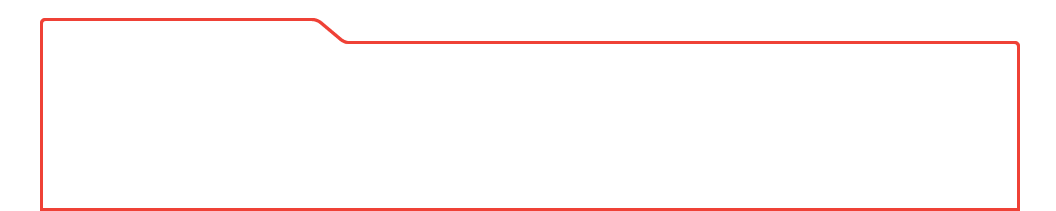
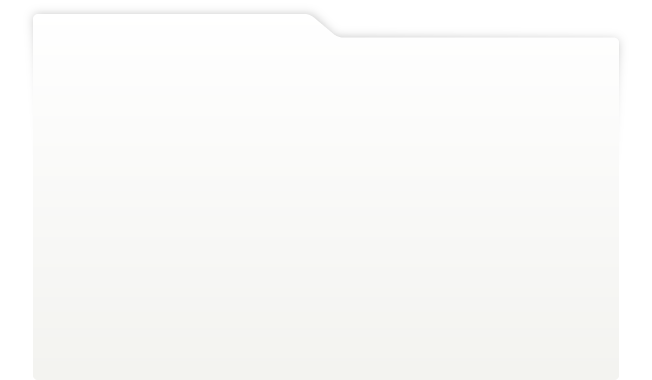
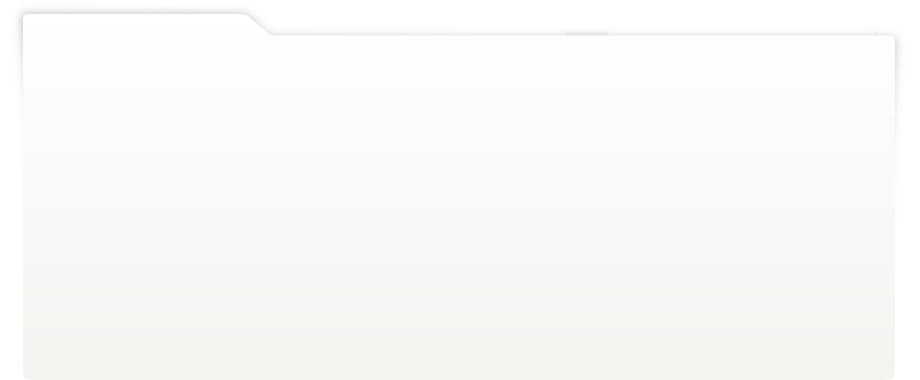
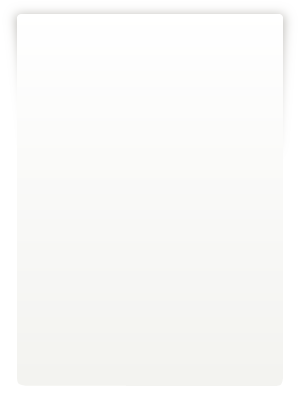
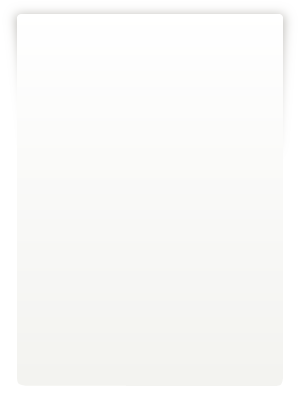
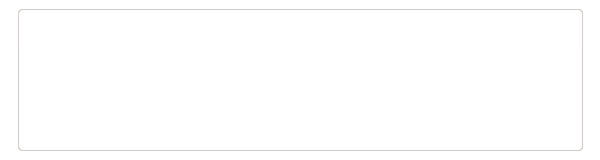
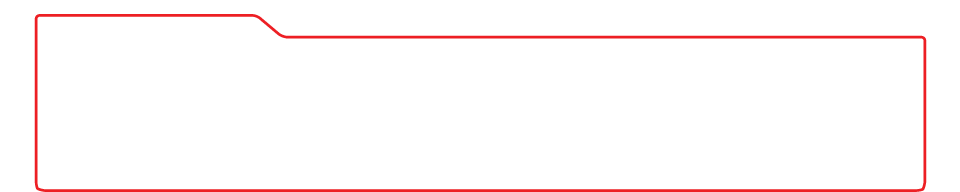
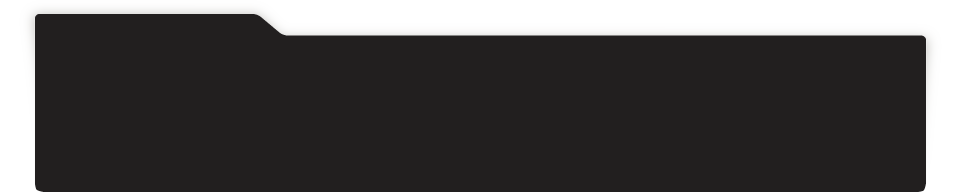
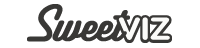
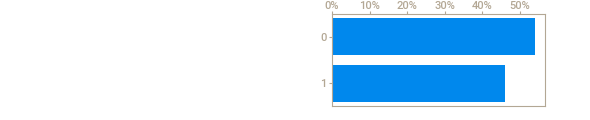
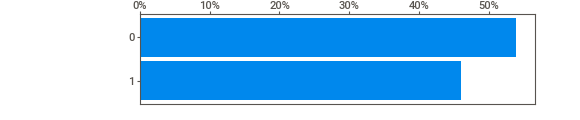
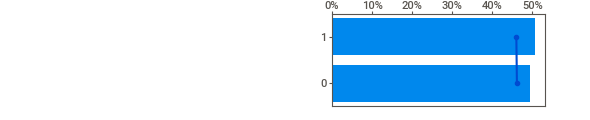
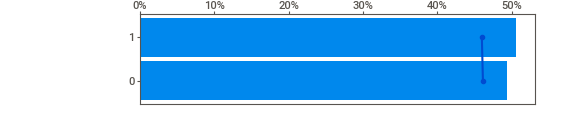
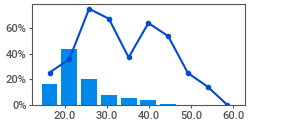
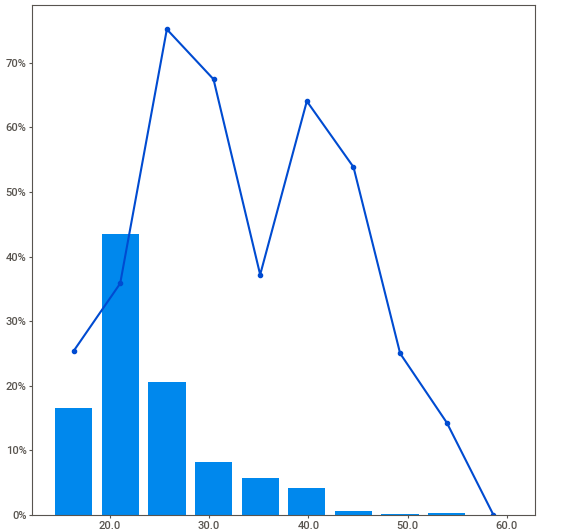
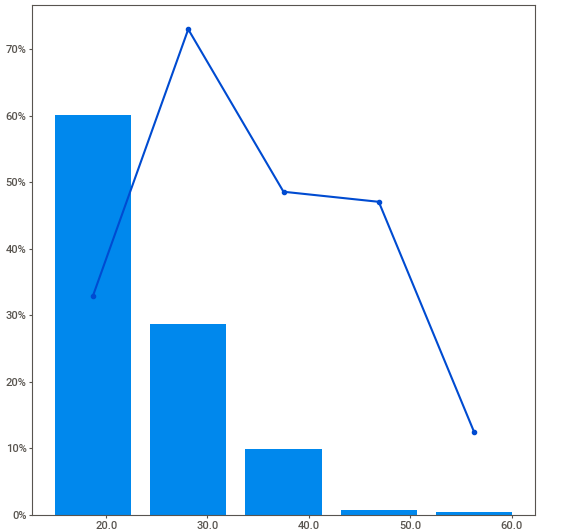
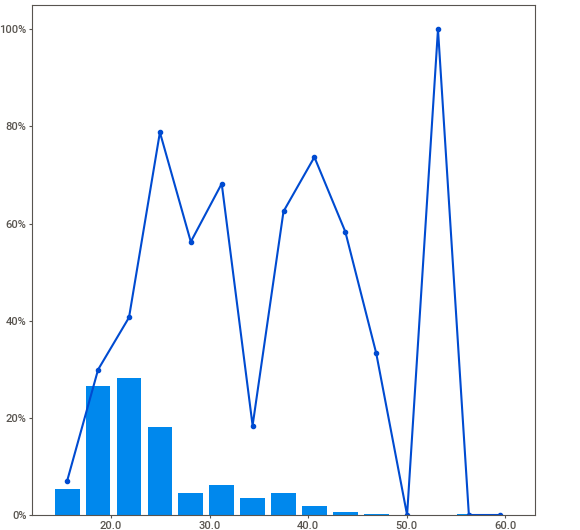
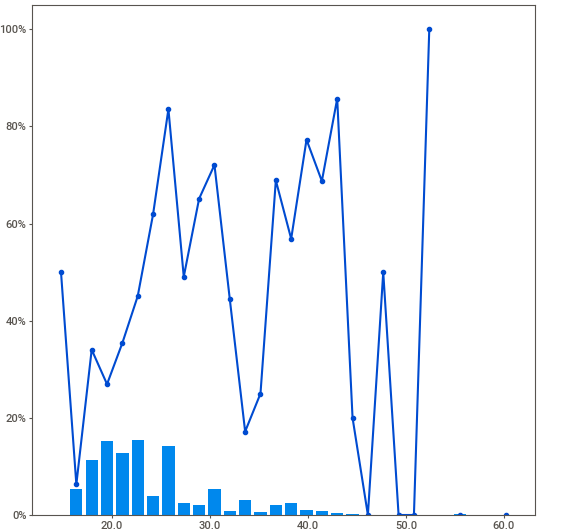
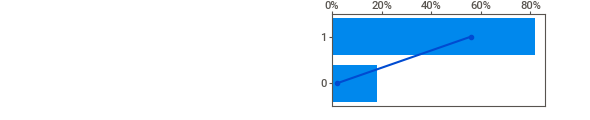
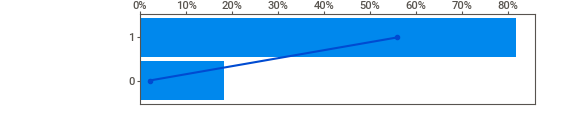
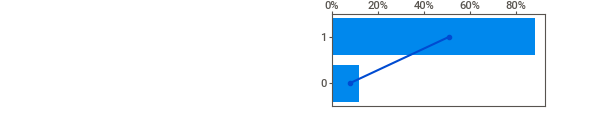
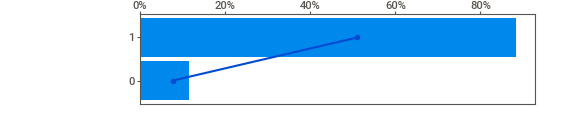
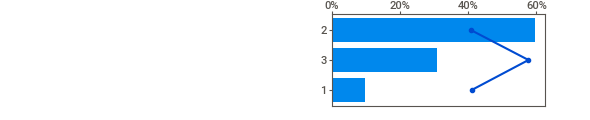
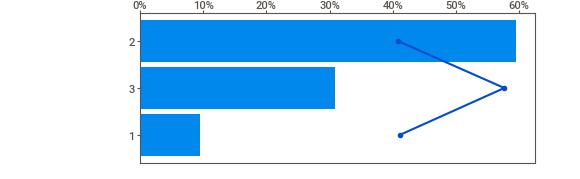
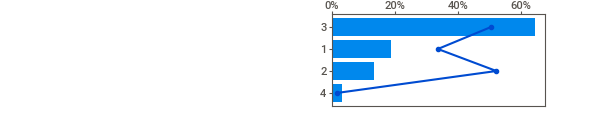
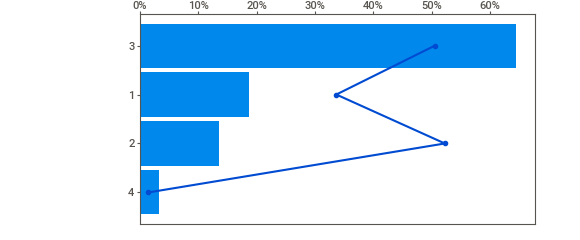
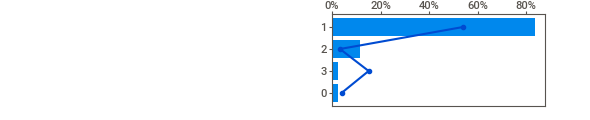
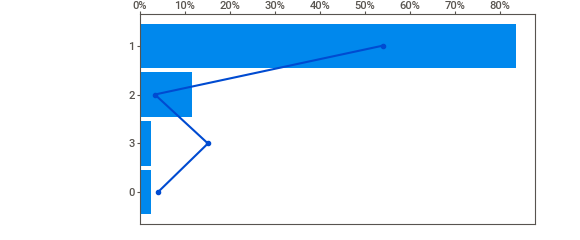
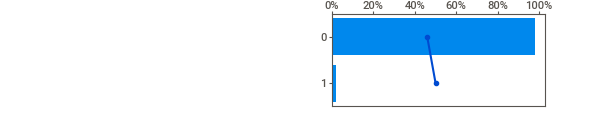
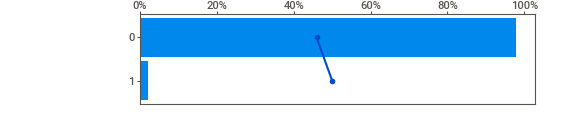
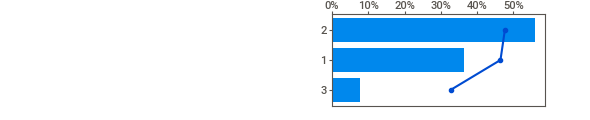
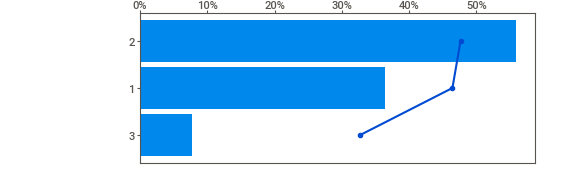
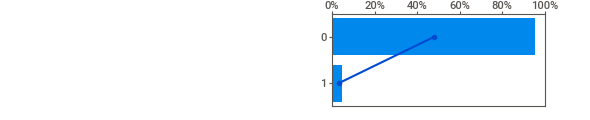
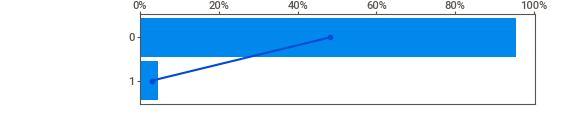
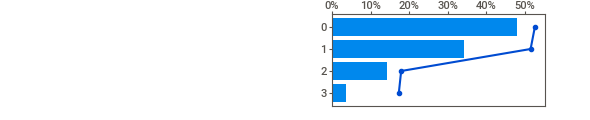
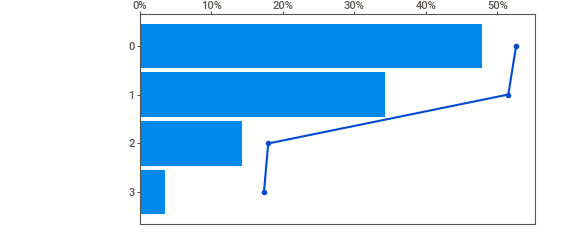
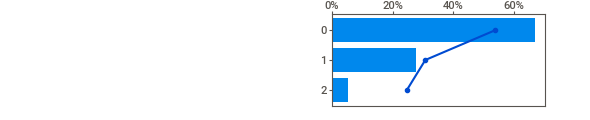
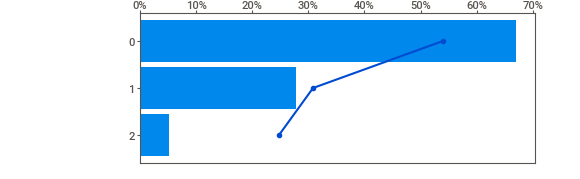
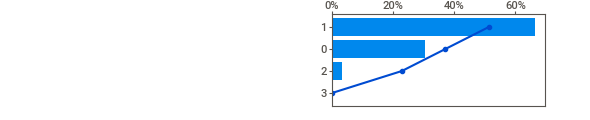
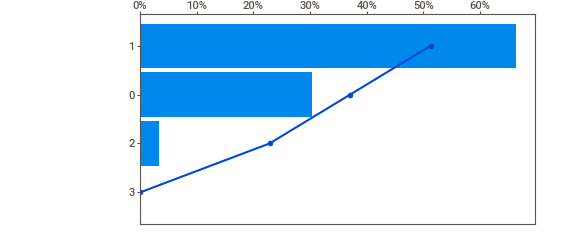
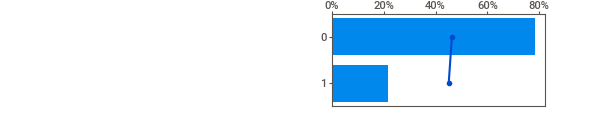
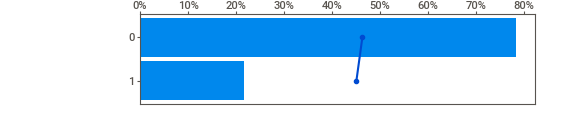
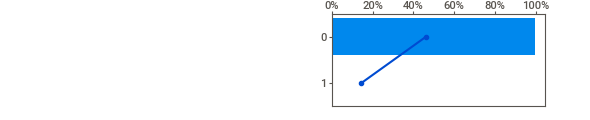
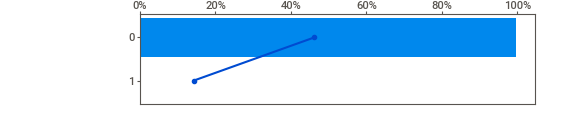
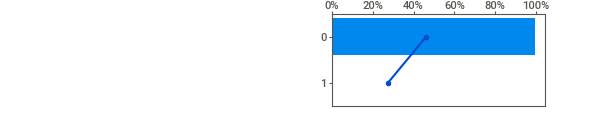
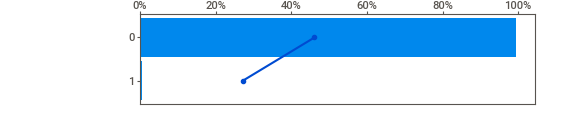
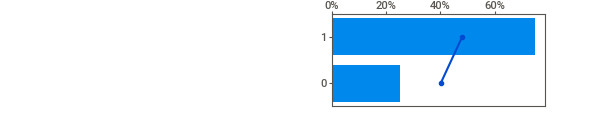
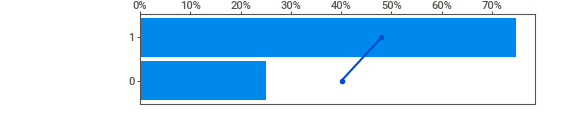
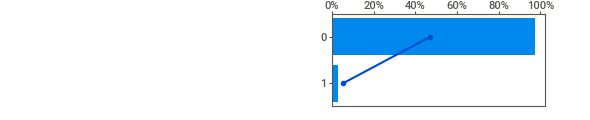
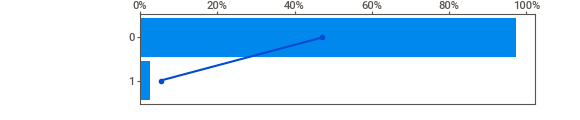
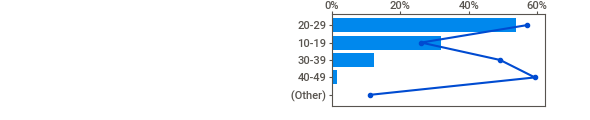
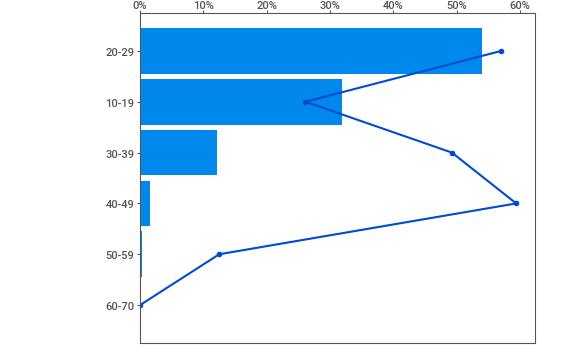
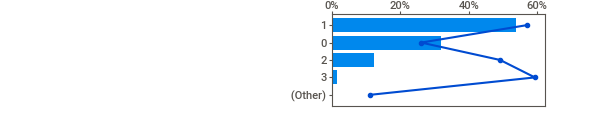
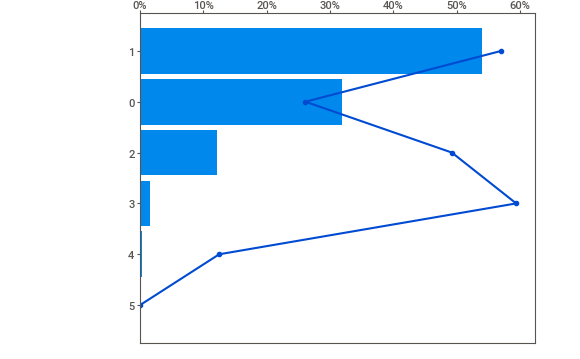
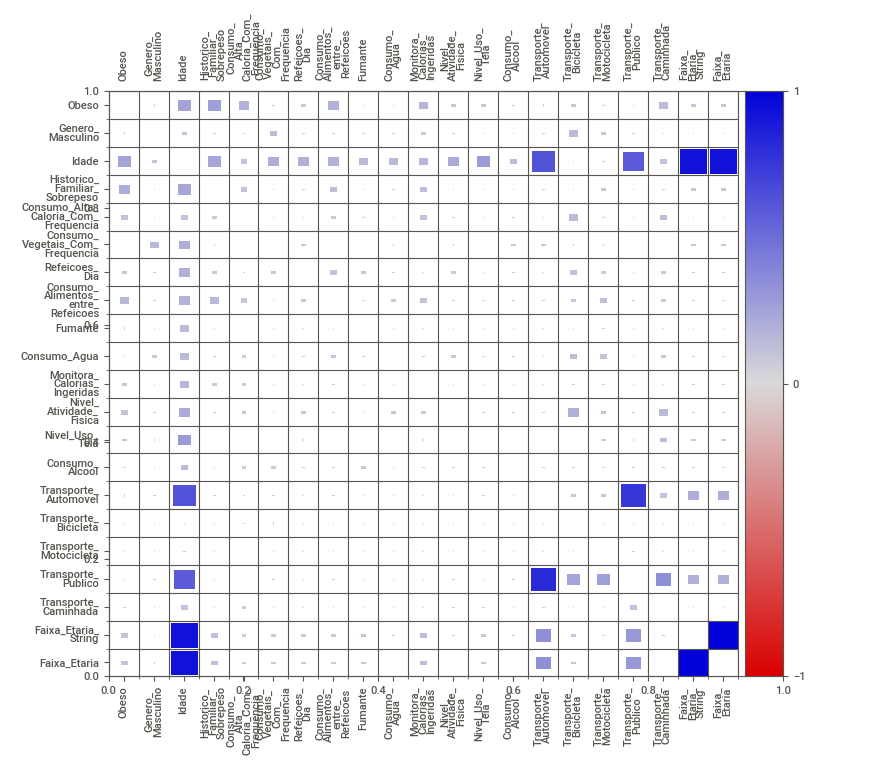
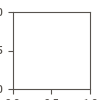

In [21]:
# Mostrar Report
sv_obesidade_report.show_notebook()

# 5 - Treinamento do modelo


## 5.1 - Treinamento do Modelo - Baseline
vamos começar o treinamento do modelo. Vamos usar o modelo baseline, que é o modelo inicial a partir do qual vamos extrair uma métrica. Para isso, vamos dividir os dados em treino e teste usando o método train-test-split. Vamos remover as colunas que não serão utilizadas, como a coluna de idade e a coluna de faixa etária string. Em seguida, vamos treinar o modelo usando o GaussianNB, que é um modelo gaussiano associado à distribuição normal. Explico também sobre a abordagem de usar dois modelos de Naive Bayes quando se tem variáveis categóricas e quantitativas no mesmo dataset. Por fim, avaliamos as métricas do modelo baseline, como recall e matriz de confusão. O objetivo é maximizar o recall, que representa a capacidade do modelo de identificar corretamente os casos positivos.

In [22]:
# Dividir Dados de Treino e Teste
X = df_obesidade.drop(columns=['Obeso', 'Idade', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade.Obeso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [23]:
# Treinamento do Modelo
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### 5.1.1 - Métricas Modelo BaseLine

In [24]:
# Métricas Modelo Base Line
# Predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [25]:
# Avaliando o Desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall:\n{recall_baseline}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


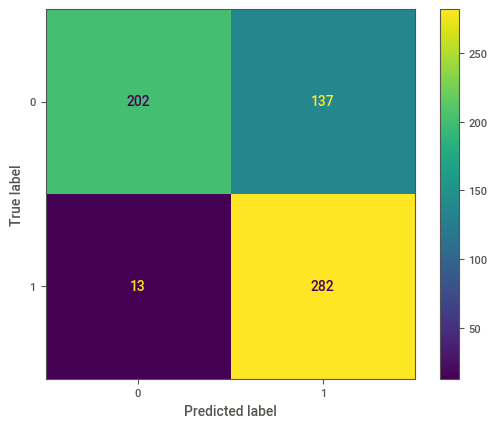

In [26]:
# Mostrar Matriz de Confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

## 5.2 - Treinamento do Modelo - Seleção de Melhores Features
vamos aprender sobre a seleção automatizada de features. Vamos usar o método SelectK Best, que seleciona as K melhores features de um dataset com base em um teste estatístico chamado qui-quadrado. Vamos criar uma variável kbest e treiná-la para selecionar as 5 melhores features do nosso conjunto de treinamento. Em seguida, vamos transformar o conjunto de treinamento usando essas features selecionadas. Vamos descobrir quais foram as features selecionadas e treinar um modelo usando apenas essas features. Por fim, vamos avaliar as métricas do modelo e compará-las com o modelo baseline.

In [27]:
# Select KBest - Seleciona as K melhores features, baseado em um teste
kbest = SelectKBest(score_func=chi2, k=5)

In [28]:
# Normalmente a gente faz o feature e o predict
# Aqui já faz o fit, transformando para o novo Data Frame
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [29]:
# Features Selecionadas
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Historico_Familiar_Sobrepeso  1477 non-null   int64   
 1   Monitora_Calorias_Ingeridas   1477 non-null   int64   
 2   Nivel_Atividade_Fisica        1477 non-null   int64   
 3   Nivel_Uso_Tela                1477 non-null   int64   
 4   Faixa_Etaria                  1477 non-null   category
dtypes: category(1), int64(4)
memory usage: 59.4 KB


In [30]:
# Treinar Modelo com Melhores Features
modelo_kbest = GaussianNB()
modelo_kbest.fit(X_train_best_features, y_train)

GaussianNB()

### 5.2.1 - Métricas Modelo Select KBest'


In [31]:
# Filtrar as features nos dados de teste
X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:, kbest_features]

In [32]:
# Predizer valores do conjunto de testes
y_pred_kbest = modelo_kbest.predict(X_test_best_features)

In [33]:
# Avaliando o Desempenho do modelo
classification_report_str = classification_report(y_test, y_pred_kbest)
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')
print(f'Relatório de Classificação (KBest):\n{classification_report_str}')
print(f'Recall (KBest):\n{recall_baseline}')

Relatório de Classificação (KBest):
              precision    recall  f1-score   support

           0       0.92      0.43      0.59       339
           1       0.59      0.96      0.73       295

    accuracy                           0.68       634
   macro avg       0.76      0.70      0.66       634
weighted avg       0.77      0.68      0.66       634

Recall (KBest):
0.6950002499875007


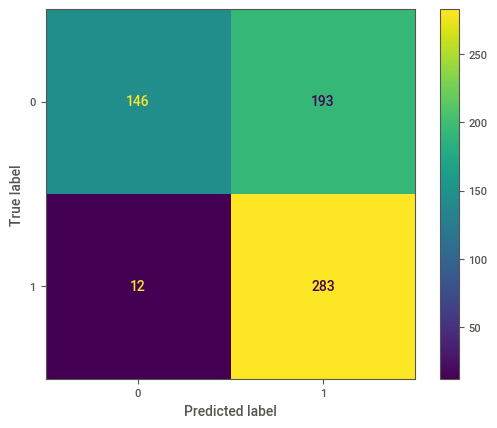

In [34]:
# Mostrar Matriz de Confusão
confusion_matrix_modelo_kbest = confusion_matrix(y_test, y_pred_kbest)
disp_modelo_kbest = ConfusionMatrixDisplay(confusion_matrix_modelo_kbest)
disp_modelo_kbest.plot()

# 6 - Otimização de Hiperparâmetros

## 6.1 - Otimização de Hiperparâmetros - Criação da Função
Vamos usar a biblioteca Optuna para fazer uma busca randômica e encontrar a melhor configuração de hiperparâmetros para obter o maior recall possível. Vou mostrar como construir essa busca usando o Optuna e explicar como funciona o conceito de otimização multi-objetivo. Vamos definir uma função que será chamada pelo Optuna e dentro dela faremos todo o processo de treinamento do modelo, extração da métrica de recall e definição do maior recall. Em seguida, vamos executar o estudo de hiperparâmetros usando o Optuna e um sampler de grid para percorrer o conjunto finito de valores do hiperparâmetro. Por fim, vamos rodar o experimento e ver os resultados das diferentes configurações testadas.

### 6.1.1 - Tunning de Hiperparâmetro

In [35]:
# Ajustar Hiperparâmetros do SelectKBest
# k = k melhores features conforme chi2

def naivebayes_optuna(trial):
    k = trial.suggest_int('k', 1, 18)

    X_train_kbest = kbest.fit_transform(X_train, y_train)

    kbest_features = kbest.get_support(indices=True)
    X_train_best_features = X_train.iloc[:, kbest_features]

    # Treinar modelo com melhores features
    modelo_kbest_optuna = GaussianNB()
    modelo_kbest_optuna.fit(X_train_best_features, y_train)

    # Aplicar Seletor de Features no Conjunto de Testes
    X_test_kbest = kbest.transform(X_test)
    X_test_best_features = X_test.iloc[:, kbest_features]

    # Predizer Valores
    y_pred_kbest = modelo_kbest_optuna.predict(X_test_best_features)

    # Avaliar Recall
    recall_optuna = recall_score(y_test, y_pred_kbest, average='macro')

    return k, recall_optuna

In [36]:
# Rodar o estudo dos Hiperparametros
search_space = {'k': range(1,9)}
estudo_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
estudo_naivebayes.optimize(naivebayes_optuna, n_trials=50)


[I 2024-04-20 11:07:23,107] A new study created in memory with name: no-name-f05beb0e-7cdb-4e60-96f9-8814b70d6563
[I 2024-04-20 11:07:23,116] Trial 0 finished with values: [8.0, 0.6950002499875007] and parameters: {'k': 8}. 
[I 2024-04-20 11:07:23,124] Trial 1 finished with values: [7.0, 0.6950002499875007] and parameters: {'k': 7}. 
[I 2024-04-20 11:07:23,134] Trial 2 finished with values: [6.0, 0.6950002499875007] and parameters: {'k': 6}. 
[I 2024-04-20 11:07:23,141] Trial 3 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}. 
[I 2024-04-20 11:07:23,151] Trial 4 finished with values: [1.0, 0.6950002499875007] and parameters: {'k': 1}. 
[I 2024-04-20 11:07:23,160] Trial 5 finished with values: [4.0, 0.6950002499875007] and parameters: {'k': 4}. 
[I 2024-04-20 11:07:23,171] Trial 6 finished with values: [3.0, 0.6950002499875007] and parameters: {'k': 3}. 
[I 2024-04-20 11:07:23,181] Trial 7 finished with values: [2.0, 0.6950002499875007] and parameters: {'k': 2}.

## 6.2 - Otimização de Hiperparâmetros - Análise
discutimos sobre a otimização de hiperparâmetros usando o SelectKBest. Explicamos que o K define a quantidade de variáveis ou features e como incluir o objeto KBest na função para obter resultados diferentes. Mostramos como analisar os valores retornados, identificar o melhor resultado e o melhor hiperparâmetro. Também apresentamos um gráfico que mostra o cruzamento dos objetivos de K e recall. Por fim, mostramos as 8 melhores features selecionadas e como salvar o modelo otimizado. Na próxima aula, aprenderemos a expor esse modelo como uma API usando uma abordagem diferente do FastAPI.

In [37]:
# Mostrar Melhor Resultado
trial_com_melhor_recall = max(estudo_naivebayes.best_trials, key=lambda t: t.values[1])
print("Trial com maior recall e menor k: ")
print(f"\ttrial number: {trial_com_melhor_recall.number}")
print(f"\tparam (k): {trial_com_melhor_recall.params}")
print(f"\tvalues (k, recall): {trial_com_melhor_recall.values}")

Trial com maior recall e menor k: 
	trial number: 4
	param (k): {'k': 1}
	values (k, recall): [1.0, 0.6950002499875007]


In [38]:
# Mostrar Chart com Trials
fig = optuna.visualization.plot_pareto_front(estudo_naivebayes)
fig.show()

In [39]:
# Quais foram as features selecionadasb

### 6.2.1 - Salvando modelo

In [40]:
joblib.dump(modelo_kbest, 'modelo_obesidade.pkl')

['modelo_obesidade.pkl']

# 7 - Expor Modelo como API (Usando Flask)

## 7.1 - Criar API para Modelo - Entrada dos Dados
vamos aprender a expor um modelo de machine learning como uma API usando o Flask. O Flask é um framework web amplamente utilizado, enquanto o Flask API é mais rápido em termos de velocidade e performance. Vamos criar um programa Python para expor a API do modelo. Importaremos os módulos necessários, como Flask, Request, Jsonify, Pydantic, FlaskPydantic, Validate, JobLib e Pandas. Criaremos uma instância do Flask e uma classe do Pydantic para receber os dados da API. Em seguida, usaremos decoradores para definir as rotas e métodos da API. Faremos a transformação dos dados e prepararemos o DataFrame para a previsão.

## 7.2 - Criar API para Modelo - Fazer Predição
estamos preparando os dados para a nossa API. Começamos transformando o body recebido em um DataFrame usando o pandas. Em seguida, adaptamos o código de bucketing que já tínhamos usado para incluir a faixa etária como uma feature. Depois, selecionamos as melhores features e realizamos a predição de obesidade. Por fim, executamos a aplicação Flask para que ela esteja pronta para receber requisições. No próximo vídeo, iremos testar o código e mostrar como fazer chamadas de API dentro do VsCode.

## 7.3 - Testar API para Modelo
encerramos a parte de teste da API. Eu demonstrei como executar a API em um servidor local usando o Python e como testá-la usando o Thunder Client, uma extensão do VSCode. Expliquei como enviar um request para a API, fornecendo um payload em formato JSON. Mostramos como interpretar a resposta da API, que retorna a classificação de obesidade com base nas variáveis fornecidas. Também demonstramos como alterar os valores das variáveis para ver como isso afeta a classificação de obesidade. Por fim, mencionamos que a API é atualizada automaticamente sempre que há uma alteração no código Python. Com isso, concluímos esta trilha e disponibilizamos o modelo como uma API. Nos vemos no próximo módulo!